In [ ]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings("default")
import sklearn
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.max_columns = 100

In [ ]:
pd.options.display.max_rows = 1000

In [6]:
import os
dr = 'exp/prepared/'
file_names = os.listdir(dr)

def lowerstr(f):
    for col in f:
        if '№ партии' in col:
            f['№ партии'] = f['№ партии'].str.lower()
        if '№ плавки' in col:
            f['№ плавки'] = f['№ плавки'].str.lower()
    return f

table_flattening = pd.read_excel(dr+file_names[0])
table_flattening = lowerstr(table_flattening) 
table_grain_size = pd.read_excel(dr+file_names[1])
table_hardenability = pd.read_excel(dr+file_names[2])
table_hardness_api = pd.read_excel(dr+file_names[3])
table_hardness_hb = pd.read_excel(dr+file_names[4])
table_hardness_hrb = pd.read_excel(dr+file_names[5])
table_hardness_hrc = pd.read_excel(dr+file_names[6])
table_macrostructure = pd.read_excel(dr+file_names[7])
table_microstructure = pd.read_excel(dr+file_names[8])
table_nonmetall = pd.read_excel(dr+file_names[9])
table_proportion_viscous_0 = pd.read_excel(dr+file_names[10])
table_proportion_viscous_20 = pd.read_excel(dr+file_names[11])
table_proportion_viscous_50 = pd.read_excel(dr+file_names[12])
table_proportion_viscous_60 = pd.read_excel(dr+file_names[13])
table_resiliency_20 = pd.read_excel(dr+file_names[14])
table_resiliency_40 = pd.read_excel(dr+file_names[15])
table_resiliency_60 = pd.read_excel(dr+file_names[16])
table_stretching = pd.read_excel(dr+file_names[17])
table_stretching = lowerstr(table_stretching)

In [7]:
df_modes = pd.read_excel('merge_table_mean_chem.xlsx')

In [8]:
df_modes.shape

(28572, 48)

In [9]:
df_merge = pd.merge(df_modes, table_stretching, how ='left', on = ['№ плавки','№ партии'])

In [10]:
df_merge.shape

(28572, 80)

In [11]:
# df_merge.to_excel('merge_stret.xlsx')

In [12]:
chem = {'Mn': 0, 'Si': 0, 'P': 0, 'S': 0,
        'Cr': 0, 'Ni': 0, 'Cu': 0, 'Al': 0, 'V': 0, 
        'Ti': 0, 'Nb': 0, 'Mo': 0, 'N': 0, 'B': 0, 
       'Предел текучести (1027)': 0}

df_merge = df_merge.fillna(value = chem)

In [13]:
df_merge.columns

Index(['№ плавки', '№ партии', 'НД (гост, ту)', 'марка стали', 'кол-во, шт.',
       '1 зона по ВТР закалка', '1 зона уставка закалка',
       '1 зона фактическая температура закалка', '2 зона по ВТР закалка',
       '3 зона по ВТР закалка', '3 зона уставка закалка',
       '3 зона фактическая температура закалка',
       'Температура трубы на выгрузке из печи закалки',
       'Скорость прохождения трубы через спрейер, м/с',
       't˚ C трубы после спреера', 'Расход воды на закалочный спрейер, м3',
       'время выдержки в закалочной ванне, сек.',
       't˚ C воды в закалочной ванне', 't˚ C трубы после ванны',
       '1 зона ВТР и уставка отпуск', '1 зона фактическая температура отпуск',
       '2 зона ВТР и уставка отпуск', '3 зона ВТР и уставка отпуск',
       '3 зона фактическая температура отпуск', '4 зона ВТР и уставка отпуск',
       '5 зона ВТР и уставка отпуск', '5 зона фактическая температура отпуск',
       'Температура трубы на выгрузке из печи отпуска',
       'шаг балок 

In [14]:
ls_fluidity = [
#     'Предел текучести (1027)'
#     'Предел текучести (1141)'
    'Врем. сопротивление (1140)'
    
]


In [15]:
ls_all = [
#     'Поставщик',
#     'НД (гост, ту)',
#     'ГОСТ, ТУ',
#     'Дата форм. цехом',
#     'марка стали',
#     '№ плавки',
#     'кол-во, шт.',
#     '№ партии',
    '1 зона по ВТР закалка', 
#     '1 зона уставка закалка',
#     '1 зона фактическая температура закалка', 
    '2 зона по ВТР закалка',
    '3 зона по ВТР закалка', 
#     '3 зона уставка закалка',
#     '3 зона фактическая температура закалка',
    'Температура трубы на выгрузке из печи закалки',
    'Скорость прохождения трубы через спрейер, м/с',
#     't˚ C трубы после спреера', 
    'Расход воды на закалочный спрейер, м3',
#     'время выдержки в закалочной ванне, сек.',
#     't˚ C воды в закалочной ванне', 
#     't˚ C трубы после ванны',
    '1 зона ВТР и уставка отпуск', 
#     '1 зона фактическая температура отпуск',
    '2 зона ВТР и уставка отпуск', 
    '3 зона ВТР и уставка отпуск',
#     '3 зона фактическая температура отпуск', 
    '4 зона ВТР и уставка отпуск',
    '5 зона ВТР и уставка отпуск', 
#     '5 зона фактическая температура отпуск',
#     'Температура трубы на выгрузке из печи отпуска',
    'шаг балок закалочная печь, сек', 
    'шаг балок отпускная печь, сек',
    'диаметр', 
    'толщина стенки', 
    'C', 
    'Mn', 
    'Si', 
    'P', 
    'S',
    'Cr', 
    'Ni', 
    'Cu', 
    'Al', 
    'V', 
    'Ti', 
    'Nb', 
    'Mo', 
    'N', 
    'B'
]

In [16]:
df_merge.shape

(28572, 80)

In [17]:
df_merge = df_merge[ls_all + ls_fluidity]

# df_merge = df_merge.fillna(0)

df_merge = df_merge.dropna()

In [18]:
# df_merge = df_merge[df_merge['t˚ C трубы после спреера'] != ' ']
# df_merge = df_merge[df_merge['t˚ C трубы после ванны'] != ' ']

In [19]:
df_merge.shape

(12809, 31)

In [20]:
y = pd.DataFrame()
X = pd.DataFrame()

for i in ls_fluidity:
    y[i] = df_merge[i]

for i in ls_all:
    X[i] = df_merge[i]

In [21]:
X.to_excel('x.xlsx')

In [22]:
y.to_excel('y.xlsx')

In [23]:
X.shape

(12809, 30)

In [24]:
scaler = StandardScaler()  

X = scaler.fit_transform(X, y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
y.shape

(12809, 1)

In [29]:
X_test.shape

(4227, 30)

In [ ]:
# scaler = StandardScaler()  

# scaler.fit(X_train) 
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) 

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import time

In [618]:
'''
SVR
'''

C=1.0
ratio = 0.9
seed=17
epsilon=0.3

svr_eps = LinearSVR(C = C)
svr_rbf = SVR(kernel='rbf', C=C, gamma=0.1)
svr_lin = SVR(kernel='linear', C=C)
svr_poly = SVR(kernel='poly', C=C, degree=2)

kfold = model_selection.KFold(n_splits=5, random_state=seed)

ls = [svr_eps, svr_rbf]

for svr in ls:
    t0 = time.time()
    cv_results = model_selection.cross_val_score(svr, 
                                             X_train, np.ravel(y_train), cv=kfold, scoring='r2')
    t1 = time.time() - t0
    print(cv_results.mean())
    print(t1)

0.684033744412
1.7135300636291504
0.689766400372
12.311769247055054


In [567]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8582, 30), (8582, 1), (4227, 30), (4227, 1))

In [568]:
'''
Подбор параметров деревьев решений
'''
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)

tree_params = {'max_depth': range(10,30),'max_features': range(5,20)}

tree_grid = GridSearchCV(tree, tree_params,cv=5, verbose = True)

tree_grid.fit(X_train, y_train)
y_pred_grid = tree_grid.predict(X_test)
print(tree_grid.best_params_)
print(tree_grid.best_score_)
print(mean_absolute_error(y_test, y_pred_grid))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
{'max_depth': 10, 'max_features': 10}
0.739086423696
2.61993030476


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   39.4s finished


In [569]:
'''
Дерево решений
'''
tree = DecisionTreeRegressor(max_depth = 22, max_features = 18)
tree.fit(X_train, y_train)

y_predicted = tree.predict(X_test)

scr = tree.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_predicted)
print(scr, mae)

0.673821898228 2.8970338623


In [570]:
forest = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

forest_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, verbose=True)

forest_grid.fit(X_train, y_train)
y_pred_grid = forest_grid.predict(X_test)
print(forest_grid.best_params_)
print(forest_grid.best_score_)
print(mean_absolute_error(y_test, y_pred_grid))

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0.791655786567
Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  5.8min finished
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 10, 'max_features': 12}
0.796284627625
2.36729073453


In [571]:
forest = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=17)
tree = DecisionTreeRegressor(max_depth = 11, max_features = 11)
estimators = [
    forest,
    tree
]

for est in estimators:
    bagging = BaggingRegressor(est,n_estimators=100, bootstrap=True, bootstrap_features=True)

    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    scr = bagging.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(scr, mae)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.813374557006 2.27336600049


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.805544331841 2.35364734574


In [572]:
forest = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=17)
tree = DecisionTreeRegressor(max_depth = 11, max_features = 11)
estimators = [
    forest,
    tree
]

for est in estimators:
    bagging = BaggingRegressor(est,n_estimators=10, bootstrap=True, bootstrap_features=True)

    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    scr = bagging.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(scr, mae)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.813647845396 2.26770126076
0.799508799989 2.38204188481


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [573]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [50, 75, 100, 500, 1000]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestRegressor(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []

    rfc.fit(X_train, y_train)
    temp_train_acc.append(rfc.score(X_train, y_train))
    temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Best accuracy on CV is 80.99% with 1000 trees


In [574]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [7, 9, 11, 13, 15]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    rfc = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    rfc.fit(X_train, y_train)
    temp_train_acc.append(rfc.score(X_train, y_train))
    temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A col

Best accuracy on CV is 81.29% with 15 max_depth


In [575]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 2, 3, 5, 7]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    rfc.fit(X_train, y_train)
    temp_train_acc.append(rfc.score(X_train, y_train))
    temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Best accuracy on CV is 81.62% with 3 min_samples_leaf


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Best accuracy on CV is 81.10% with 12 max_features


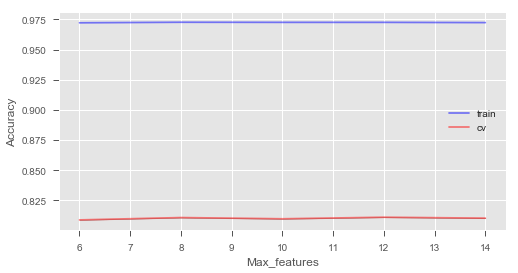

In [576]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [6, 8, 10, 12, 14]

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    rfc.fit(X_train, y_train)
    temp_train_acc.append(rfc.score(X_train, y_train))
    temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

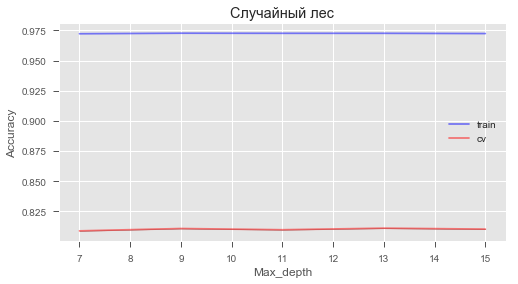

In [577]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")
plt.title("Случайный лес")
plt.show()

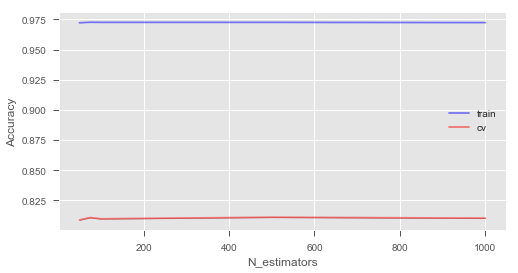

In [578]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

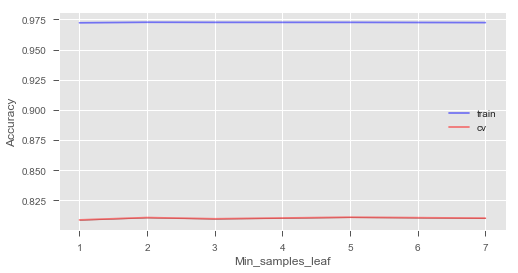

In [579]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

In [580]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'max_features': [14], 'min_samples_leaf': [2], 'max_depth': [ 15]}
rfc = RandomForestRegressor(n_estimators=500, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=5, verbose=1)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.4s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.8s finished
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [14], 'min_samples_leaf': [2], 'max_depth': [15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [581]:
y_predicted = gcv.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
print(gcv.best_estimator_, 'r2 = ', gcv.best_score_, 'mae = ', mae, 'mse =', mse)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=14, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False) r2 =  0.806767262041 mae =  2.25543772698 mse = 10.0178822077


In [585]:
rfc = RandomForestRegressor(max_features = 12, max_depth = 15, min_samples_leaf = 3, n_estimators=1000, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
scr = rfc.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(scr, mae, mse)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.816610415812 2.26042939167 10.1013796425


In [583]:
from sklearn.neural_network import MLPRegressor

In [619]:
scaler = StandardScaler()  

scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

NN = MLPRegressor(hidden_layer_sizes=(200, 3), activation='tanh', solver='sgd', 
                  alpha=0.01, batch_size=512, learning_rate='adaptive', 
                  learning_rate_init=0.1, power_t=0.7, 
                  max_iter=10000, tol=e-15, verbose=True)

NN.fit(X_train, y_train)

y_pred = NN.predict(X_test)

scr = NN.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
print(scr, mae)

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 602.90858989
Iteration 2, loss = 39.18626137
Iteration 3, loss = 24.77879135
Iteration 4, loss = 23.91241766
Iteration 5, loss = 23.83330668
Iteration 6, loss = 23.79456068
Iteration 7, loss = 23.76193016
Iteration 8, loss = 23.76458549
Iteration 9, loss = 23.76442647
Iteration 10, loss = 23.75807233
Iteration 11, loss = 23.79244929
Iteration 12, loss = 23.75216588
Iteration 13, loss = 23.79616860
Iteration 14, loss = 23.78190417
Iteration 15, loss = 23.74803117
Iteration 16, loss = 23.76735083
Iteration 17, loss = 23.74079072
Iteration 18, loss = 23.76263850
Iteration 19, loss = 23.75909832
Iteration 20, loss = 23.76760769
Iteration 21, loss = 23.74886677
Iteration 22, loss = 23.73345680
Iteration 23, loss = 23.76460686
Iteration 24, loss = 23.78463253
Iteration 25, loss = 23.82245539
Iteration 26, loss = 23.73793460
Iteration 27, loss = 23.76021986
Iteration 28, loss = 23.76962056
Iteration 29, loss = 23.72599064
Iteration 30, loss = 23.75090669
Iteration 31, loss

Iteration 248, loss = 23.55302382
Iteration 249, loss = 23.54040820
Iteration 250, loss = 23.55373584
Iteration 251, loss = 23.52351997
Iteration 252, loss = 23.53198327
Iteration 253, loss = 23.54956864
Iteration 254, loss = 23.53166235
Iteration 255, loss = 23.57555627
Iteration 256, loss = 23.58743491
Iteration 257, loss = 23.53640356
Iteration 258, loss = 23.51713462
Iteration 259, loss = 23.57890426
Iteration 260, loss = 23.58050882
Iteration 261, loss = 23.55273391
Iteration 262, loss = 23.54719054
Iteration 263, loss = 23.55431442
Iteration 264, loss = 23.52947191
Iteration 265, loss = 23.52327856
Iteration 266, loss = 23.51618265
Iteration 267, loss = 23.55030413
Iteration 268, loss = 23.53853800
Iteration 269, loss = 23.54755089
Iteration 270, loss = 23.54724136
Iteration 271, loss = 23.58324043
Iteration 272, loss = 23.51290309
Iteration 273, loss = 23.55602966
Iteration 274, loss = 23.51434707
Iteration 275, loss = 23.55800105
Iteration 276, loss = 23.52359605
Iteration 277,

Iteration 490, loss = 23.37311509
Iteration 491, loss = 23.38300221
Iteration 492, loss = 23.37102623
Iteration 493, loss = 23.38357514
Iteration 494, loss = 23.36090797
Iteration 495, loss = 23.38920203
Iteration 496, loss = 23.35739760
Iteration 497, loss = 23.35670977
Iteration 498, loss = 23.36468751
Iteration 499, loss = 23.38851240
Iteration 500, loss = 23.38578405
Iteration 501, loss = 23.36547964
Iteration 502, loss = 23.35581218
Iteration 503, loss = 23.37473367
Iteration 504, loss = 23.36272223
Iteration 505, loss = 23.36785178
Iteration 506, loss = 23.37058870
Iteration 507, loss = 23.41232675
Iteration 508, loss = 23.35455167
Iteration 509, loss = 23.34820386
Iteration 510, loss = 23.36412749
Iteration 511, loss = 23.37305484
Iteration 512, loss = 23.36159942
Iteration 513, loss = 23.38110898
Iteration 514, loss = 23.35800301
Iteration 515, loss = 23.36817454
Iteration 516, loss = 23.37088819
Iteration 517, loss = 23.36309357
Iteration 518, loss = 23.40162377
Iteration 519,

Iteration 733, loss = 23.23908236
Iteration 734, loss = 23.17510547
Iteration 735, loss = 23.27401598
Iteration 736, loss = 23.25064263
Iteration 737, loss = 23.24063749
Iteration 738, loss = 23.21934002
Iteration 739, loss = 23.25199940
Iteration 740, loss = 23.23414286
Iteration 741, loss = 23.21803410
Iteration 742, loss = 23.23590209
Iteration 743, loss = 23.21527608
Iteration 744, loss = 23.21733874
Iteration 745, loss = 23.26782579
Iteration 746, loss = 23.25239529
Iteration 747, loss = 23.22357705
Iteration 748, loss = 23.25382236
Iteration 749, loss = 23.20622959
Iteration 750, loss = 23.23326771
Iteration 751, loss = 23.22606767
Iteration 752, loss = 23.20213422
Iteration 753, loss = 23.30307745
Iteration 754, loss = 23.21176184
Iteration 755, loss = 23.20200912
Iteration 756, loss = 23.25321884
Iteration 757, loss = 23.21744391
Iteration 758, loss = 23.21409446
Iteration 759, loss = 23.23436361
Iteration 760, loss = 23.21398710
Iteration 761, loss = 23.19911871
Iteration 762,

Iteration 974, loss = 23.10354458
Iteration 975, loss = 23.14864446
Iteration 976, loss = 23.11122826
Iteration 977, loss = 23.14237151
Iteration 978, loss = 23.14057226
Iteration 979, loss = 23.09632670
Iteration 980, loss = 23.12916048
Iteration 981, loss = 23.13954846
Iteration 982, loss = 23.15060000
Iteration 983, loss = 23.10653684
Iteration 984, loss = 23.09344979
Iteration 985, loss = 23.13251619
Iteration 986, loss = 23.10066119
Iteration 987, loss = 23.17808806
Iteration 988, loss = 23.09249207
Iteration 989, loss = 23.11448281
Iteration 990, loss = 23.15272521
Iteration 991, loss = 23.12298018
Iteration 992, loss = 23.11179294
Iteration 993, loss = 23.10590320
Iteration 994, loss = 23.12554446
Iteration 995, loss = 23.11431830
Iteration 996, loss = 23.10233582
Iteration 997, loss = 23.11051729
Iteration 998, loss = 23.12440368
Iteration 999, loss = 23.09552782
Iteration 1000, loss = 23.12056108
Iteration 1001, loss = 23.11385062
Iteration 1002, loss = 23.13335666
Iteration 1

Iteration 1209, loss = 23.04627310
Iteration 1210, loss = 23.04514022
Iteration 1211, loss = 23.03020837
Iteration 1212, loss = 23.05084788
Iteration 1213, loss = 23.07784245
Iteration 1214, loss = 23.03584990
Iteration 1215, loss = 23.03452545
Iteration 1216, loss = 23.04758939
Iteration 1217, loss = 23.04005254
Iteration 1218, loss = 23.03155546
Iteration 1219, loss = 23.05271407
Iteration 1220, loss = 23.06135098
Iteration 1221, loss = 23.04200764
Iteration 1222, loss = 23.03403370
Iteration 1223, loss = 23.05772662
Iteration 1224, loss = 23.02656112
Iteration 1225, loss = 23.05806376
Iteration 1226, loss = 23.02603503
Iteration 1227, loss = 23.05375241
Iteration 1228, loss = 23.04974331
Iteration 1229, loss = 23.03067397
Iteration 1230, loss = 23.03818167
Iteration 1231, loss = 23.02705616
Iteration 1232, loss = 23.05229809
Iteration 1233, loss = 23.05308268
Iteration 1234, loss = 23.11437796
Iteration 1235, loss = 23.06200281
Iteration 1236, loss = 23.03079761
Iteration 1237, loss

Iteration 1445, loss = 22.97096880
Iteration 1446, loss = 23.00140338
Iteration 1447, loss = 22.97278571
Iteration 1448, loss = 22.95979614
Iteration 1449, loss = 23.00770192
Iteration 1450, loss = 22.96228273
Iteration 1451, loss = 22.96002642
Iteration 1452, loss = 23.00278802
Iteration 1453, loss = 22.96694680
Iteration 1454, loss = 22.99210274
Iteration 1455, loss = 22.97290075
Iteration 1456, loss = 22.98007032
Iteration 1457, loss = 23.03333442
Iteration 1458, loss = 22.96405759
Iteration 1459, loss = 22.98485795
Iteration 1460, loss = 22.99988078
Iteration 1461, loss = 22.97355644
Iteration 1462, loss = 22.98554333
Iteration 1463, loss = 22.98309916
Iteration 1464, loss = 23.01336565
Iteration 1465, loss = 22.96271843
Iteration 1466, loss = 22.96798457
Iteration 1467, loss = 22.98959422
Iteration 1468, loss = 22.96232104
Iteration 1469, loss = 22.96400747
Iteration 1470, loss = 22.97435693
Iteration 1471, loss = 22.93399525
Iteration 1472, loss = 22.93936346
Iteration 1473, loss

Iteration 1684, loss = 22.89487176
Iteration 1685, loss = 22.92058407
Iteration 1686, loss = 22.89966942
Iteration 1687, loss = 22.94221105
Iteration 1688, loss = 22.89243656
Iteration 1689, loss = 22.90338384
Iteration 1690, loss = 22.91661368
Iteration 1691, loss = 22.93743895
Iteration 1692, loss = 22.90248618
Iteration 1693, loss = 22.96401802
Iteration 1694, loss = 22.93612466
Iteration 1695, loss = 22.89347102
Iteration 1696, loss = 22.93712486
Iteration 1697, loss = 22.89138223
Iteration 1698, loss = 22.90870061
Iteration 1699, loss = 22.89311876
Iteration 1700, loss = 22.87152085
Iteration 1701, loss = 22.89527776
Iteration 1702, loss = 22.94510803
Iteration 1703, loss = 22.88955553
Iteration 1704, loss = 22.89815407
Iteration 1705, loss = 22.92638701
Iteration 1706, loss = 22.91668311
Iteration 1707, loss = 22.90648821
Iteration 1708, loss = 22.92330067
Iteration 1709, loss = 22.89046305
Iteration 1710, loss = 22.87773608
Iteration 1711, loss = 22.89404961
Iteration 1712, loss

Iteration 1920, loss = 22.73799847
Iteration 1921, loss = 22.75094822
Iteration 1922, loss = 22.75664608
Iteration 1923, loss = 22.75092545
Iteration 1924, loss = 22.73717205
Iteration 1925, loss = 22.73793190
Iteration 1926, loss = 22.78167961
Iteration 1927, loss = 22.72525419
Iteration 1928, loss = 22.75322265
Iteration 1929, loss = 22.74517917
Iteration 1930, loss = 22.72965611
Iteration 1931, loss = 22.73867910
Iteration 1932, loss = 22.79077860
Iteration 1933, loss = 22.69561673
Iteration 1934, loss = 22.74821890
Iteration 1935, loss = 22.73106749
Iteration 1936, loss = 22.73166803
Iteration 1937, loss = 22.74270240
Iteration 1938, loss = 22.72992596
Iteration 1939, loss = 22.72770047
Iteration 1940, loss = 22.73384291
Iteration 1941, loss = 22.72392220
Iteration 1942, loss = 22.75568892
Iteration 1943, loss = 22.76124849
Iteration 1944, loss = 22.73787616
Iteration 1945, loss = 22.74377495
Iteration 1946, loss = 22.77229380
Iteration 1947, loss = 22.74081131
Iteration 1948, loss

Iteration 2155, loss = 20.66673150
Iteration 2156, loss = 20.67595226
Iteration 2157, loss = 20.64103097
Iteration 2158, loss = 20.65544212
Iteration 2159, loss = 20.65482407
Iteration 2160, loss = 20.62949768
Iteration 2161, loss = 20.65381209
Iteration 2162, loss = 20.64958555
Iteration 2163, loss = 20.65330869
Iteration 2164, loss = 20.64425217
Iteration 2165, loss = 20.68162433
Iteration 2166, loss = 20.67812279
Iteration 2167, loss = 20.64922146
Iteration 2168, loss = 20.64130080
Iteration 2169, loss = 20.67930212
Iteration 2170, loss = 20.67413573
Iteration 2171, loss = 20.66410614
Iteration 2172, loss = 20.72402524
Iteration 2173, loss = 20.64637882
Iteration 2174, loss = 20.65512912
Iteration 2175, loss = 20.68592587
Iteration 2176, loss = 20.64340944
Iteration 2177, loss = 20.64518021
Iteration 2178, loss = 20.63974600
Iteration 2179, loss = 20.63329111
Iteration 2180, loss = 20.64146182
Iteration 2181, loss = 20.62833937
Iteration 2182, loss = 20.66250134
Iteration 2183, loss

Iteration 2393, loss = 16.24080482
Iteration 2394, loss = 16.30973982
Iteration 2395, loss = 16.30496079
Iteration 2396, loss = 16.25598513
Iteration 2397, loss = 16.27436314
Iteration 2398, loss = 16.24139898
Iteration 2399, loss = 16.23394773
Iteration 2400, loss = 16.24311854
Iteration 2401, loss = 16.23908790
Iteration 2402, loss = 16.22003856
Iteration 2403, loss = 16.19921035
Iteration 2404, loss = 16.17961634
Iteration 2405, loss = 16.16639105
Iteration 2406, loss = 16.15790168
Iteration 2407, loss = 16.19050130
Iteration 2408, loss = 16.16913029
Iteration 2409, loss = 16.16268780
Iteration 2410, loss = 16.16759211
Iteration 2411, loss = 16.17876093
Iteration 2412, loss = 16.15947728
Iteration 2413, loss = 16.16176356
Iteration 2414, loss = 16.16212969
Iteration 2415, loss = 16.14556216
Iteration 2416, loss = 16.15548654
Iteration 2417, loss = 16.16153940
Iteration 2418, loss = 16.17014911
Iteration 2419, loss = 16.16923649
Iteration 2420, loss = 16.15474593
Iteration 2421, loss

Iteration 2631, loss = 16.06242707
Iteration 2632, loss = 16.05439916
Iteration 2633, loss = 16.04037890
Iteration 2634, loss = 16.05560911
Iteration 2635, loss = 16.05805583
Iteration 2636, loss = 16.06275712
Iteration 2637, loss = 16.04848608
Iteration 2638, loss = 16.04913335
Iteration 2639, loss = 16.08316656
Iteration 2640, loss = 16.04699951
Iteration 2641, loss = 16.05446891
Iteration 2642, loss = 16.07664544
Iteration 2643, loss = 16.05361022
Iteration 2644, loss = 16.03251773
Iteration 2645, loss = 16.07627239
Iteration 2646, loss = 16.05534773
Iteration 2647, loss = 16.06960820
Iteration 2648, loss = 16.05918287
Iteration 2649, loss = 16.07038248
Iteration 2650, loss = 16.07975501
Iteration 2651, loss = 16.06186230
Iteration 2652, loss = 16.05579526
Iteration 2653, loss = 16.05960501
Iteration 2654, loss = 16.03396844
Iteration 2655, loss = 16.05594136
Iteration 2656, loss = 16.04965321
Iteration 2657, loss = 16.04749884
Iteration 2658, loss = 16.05703313
Iteration 2659, loss

Iteration 2867, loss = 14.94081025
Iteration 2868, loss = 14.94281633
Iteration 2869, loss = 14.94056925
Iteration 2870, loss = 14.94085224
Iteration 2871, loss = 14.94659099
Iteration 2872, loss = 14.94426682
Iteration 2873, loss = 14.93059349
Iteration 2874, loss = 14.95241787
Iteration 2875, loss = 14.94806420
Iteration 2876, loss = 14.94651588
Iteration 2877, loss = 14.95070178
Iteration 2878, loss = 14.94161289
Iteration 2879, loss = 14.95346135
Iteration 2880, loss = 14.92711423
Iteration 2881, loss = 14.93569472
Iteration 2882, loss = 14.94114650
Iteration 2883, loss = 14.92415939
Iteration 2884, loss = 14.93919470
Iteration 2885, loss = 14.95059119
Iteration 2886, loss = 14.95180075
Iteration 2887, loss = 14.94221699
Iteration 2888, loss = 14.93706016
Iteration 2889, loss = 14.93743080
Iteration 2890, loss = 14.92533423
Iteration 2891, loss = 14.95111081
Iteration 2892, loss = 14.94560574
Iteration 2893, loss = 14.93930645
Iteration 2894, loss = 14.92901053
Iteration 2895, loss

Iteration 3103, loss = 14.92126214
Iteration 3104, loss = 14.89401816
Iteration 3105, loss = 14.90118052
Iteration 3106, loss = 14.86929395
Iteration 3107, loss = 14.89308593
Iteration 3108, loss = 14.88271456
Iteration 3109, loss = 14.88782056
Iteration 3110, loss = 14.88111289
Iteration 3111, loss = 14.87500327
Iteration 3112, loss = 14.87940319
Iteration 3113, loss = 14.88260327
Iteration 3114, loss = 14.88895617
Iteration 3115, loss = 14.87645918
Iteration 3116, loss = 14.87563984
Iteration 3117, loss = 14.87021090
Iteration 3118, loss = 14.88018005
Iteration 3119, loss = 14.88421801
Iteration 3120, loss = 14.88685410
Iteration 3121, loss = 14.87364780
Iteration 3122, loss = 14.88269009
Iteration 3123, loss = 14.88532155
Iteration 3124, loss = 14.87399196
Iteration 3125, loss = 14.88931366
Iteration 3126, loss = 14.90791520
Iteration 3127, loss = 14.88977342
Iteration 3128, loss = 14.87282389
Iteration 3129, loss = 14.89171376
Iteration 3130, loss = 14.87942989
Iteration 3131, loss

Iteration 3341, loss = 13.86126469
Iteration 3342, loss = 13.83189594
Iteration 3343, loss = 13.83961829
Iteration 3344, loss = 13.86099374
Iteration 3345, loss = 13.86111157
Iteration 3346, loss = 13.84050850
Iteration 3347, loss = 13.84323094
Iteration 3348, loss = 13.84225971
Iteration 3349, loss = 13.87166846
Iteration 3350, loss = 13.86523684
Iteration 3351, loss = 13.84297005
Iteration 3352, loss = 13.85127985
Iteration 3353, loss = 13.84443069
Iteration 3354, loss = 13.84845512
Iteration 3355, loss = 13.83941182
Iteration 3356, loss = 13.80646252
Iteration 3357, loss = 13.86163595
Iteration 3358, loss = 13.83178423
Iteration 3359, loss = 13.83173123
Iteration 3360, loss = 13.84442287
Iteration 3361, loss = 13.83267139
Iteration 3362, loss = 13.86154653
Iteration 3363, loss = 13.84491551
Iteration 3364, loss = 13.84072102
Iteration 3365, loss = 13.82538384
Iteration 3366, loss = 13.84538642
Iteration 3367, loss = 13.83494930
Iteration 3368, loss = 13.84577491
Iteration 3369, loss

Iteration 3579, loss = 8.43934307
Iteration 3580, loss = 8.31683881
Iteration 3581, loss = 8.38421134
Iteration 3582, loss = 8.42418729
Iteration 3583, loss = 8.54692523
Iteration 3584, loss = 8.50762056
Iteration 3585, loss = 8.33977449
Iteration 3586, loss = 8.26812248
Iteration 3587, loss = 8.33312529
Iteration 3588, loss = 8.29011032
Iteration 3589, loss = 8.27948184
Iteration 3590, loss = 8.46945730
Iteration 3591, loss = 8.69196785
Iteration 3592, loss = 8.34032785
Iteration 3593, loss = 8.29847074
Iteration 3594, loss = 8.25183515
Iteration 3595, loss = 8.23775344
Iteration 3596, loss = 8.20321835
Iteration 3597, loss = 8.13434606
Iteration 3598, loss = 8.10830131
Iteration 3599, loss = 8.57200435
Iteration 3600, loss = 8.99645362
Iteration 3601, loss = 8.76830645
Iteration 3602, loss = 8.68157742
Iteration 3603, loss = 8.34670068
Iteration 3604, loss = 8.30569940
Iteration 3605, loss = 8.38630266
Iteration 3606, loss = 8.48340056
Iteration 3607, loss = 8.68833324
Iteration 3608

Iteration 3820, loss = 8.59733089
Iteration 3821, loss = 8.80842586
Iteration 3822, loss = 8.69269094
Iteration 3823, loss = 8.64837963
Iteration 3824, loss = 8.55050326
Iteration 3825, loss = 8.45914211
Iteration 3826, loss = 8.44558176
Iteration 3827, loss = 8.44565465
Iteration 3828, loss = 8.39298225
Iteration 3829, loss = 8.29730340
Iteration 3830, loss = 8.31497009
Iteration 3831, loss = 8.36685634
Iteration 3832, loss = 8.40615973
Iteration 3833, loss = 8.71583262
Iteration 3834, loss = 8.48794599
Iteration 3835, loss = 8.41058434
Iteration 3836, loss = 8.36552789
Iteration 3837, loss = 8.40351824
Iteration 3838, loss = 8.29845781
Iteration 3839, loss = 8.42853263
Iteration 3840, loss = 8.38867400
Iteration 3841, loss = 8.35410434
Iteration 3842, loss = 8.33208995
Iteration 3843, loss = 8.33792529
Iteration 3844, loss = 8.41627473
Iteration 3845, loss = 8.40190722
Iteration 3846, loss = 8.55518621
Iteration 3847, loss = 8.32350596
Iteration 3848, loss = 8.47187925
Iteration 3849

Iteration 4064, loss = 8.80144619
Iteration 4065, loss = 9.02428146
Iteration 4066, loss = 8.65702103
Iteration 4067, loss = 8.73038319
Iteration 4068, loss = 8.95421347
Iteration 4069, loss = 9.56613867
Iteration 4070, loss = 9.59566040
Iteration 4071, loss = 9.66764916
Iteration 4072, loss = 9.27023553
Iteration 4073, loss = 8.94984913
Iteration 4074, loss = 9.05085016
Iteration 4075, loss = 8.89108226
Iteration 4076, loss = 8.87741491
Iteration 4077, loss = 9.09766001
Iteration 4078, loss = 8.97776538
Iteration 4079, loss = 8.89240200
Iteration 4080, loss = 8.96626314
Iteration 4081, loss = 8.83361815
Iteration 4082, loss = 8.75002962
Iteration 4083, loss = 8.88008302
Iteration 4084, loss = 8.75959431
Iteration 4085, loss = 8.80820578
Iteration 4086, loss = 8.83063634
Iteration 4087, loss = 8.53122556
Iteration 4088, loss = 8.69020814
Iteration 4089, loss = 8.68663856
Iteration 4090, loss = 8.60517451
Iteration 4091, loss = 8.37971716
Iteration 4092, loss = 8.34294342
Iteration 4093

Iteration 4306, loss = 6.56271310
Iteration 4307, loss = 6.58550810
Iteration 4308, loss = 6.61013412
Iteration 4309, loss = 6.59775624
Iteration 4310, loss = 6.60966090
Iteration 4311, loss = 6.63777547
Iteration 4312, loss = 6.76640499
Iteration 4313, loss = 6.64009462
Iteration 4314, loss = 6.76174827
Iteration 4315, loss = 6.76291857
Iteration 4316, loss = 6.67071071
Iteration 4317, loss = 6.80118615
Iteration 4318, loss = 6.79586973
Iteration 4319, loss = 6.87828149
Iteration 4320, loss = 6.77201100
Iteration 4321, loss = 6.80579706
Iteration 4322, loss = 6.77399143
Iteration 4323, loss = 6.79762034
Iteration 4324, loss = 6.76099320
Iteration 4325, loss = 6.85920416
Iteration 4326, loss = 6.83360271
Iteration 4327, loss = 6.75624212
Iteration 4328, loss = 6.76127095
Iteration 4329, loss = 6.67289814
Iteration 4330, loss = 6.70199758
Iteration 4331, loss = 6.65689443
Iteration 4332, loss = 6.64086173
Iteration 4333, loss = 6.69679139
Iteration 4334, loss = 6.80029458
Iteration 4335

Iteration 4547, loss = 6.53491436
Iteration 4548, loss = 6.50664912
Iteration 4549, loss = 6.49679398
Iteration 4550, loss = 6.44383886
Iteration 4551, loss = 6.43046794
Iteration 4552, loss = 6.45287622
Iteration 4553, loss = 6.52563767
Iteration 4554, loss = 6.52529418
Iteration 4555, loss = 6.54319592
Iteration 4556, loss = 6.44860290
Iteration 4557, loss = 6.43615441
Iteration 4558, loss = 6.47742810
Iteration 4559, loss = 6.49815375
Iteration 4560, loss = 6.41827158
Iteration 4561, loss = 6.47358903
Iteration 4562, loss = 6.42737024
Iteration 4563, loss = 6.50462505
Iteration 4564, loss = 6.50865465
Iteration 4565, loss = 6.53583173
Iteration 4566, loss = 6.52857265
Iteration 4567, loss = 6.55849962
Iteration 4568, loss = 6.57838922
Iteration 4569, loss = 6.45392461
Iteration 4570, loss = 6.55507321
Iteration 4571, loss = 6.60788457
Iteration 4572, loss = 6.63669081
Iteration 4573, loss = 6.54517657
Iteration 4574, loss = 6.52575279
Iteration 4575, loss = 6.52248531
Iteration 4576

Iteration 5029, loss = 6.61654796
Iteration 5030, loss = 6.54911646
Iteration 5031, loss = 6.66077699
Iteration 5032, loss = 6.64260325
Iteration 5033, loss = 6.57080392
Iteration 5034, loss = 6.57520847
Iteration 5035, loss = 6.56074400
Iteration 5036, loss = 6.60542061
Iteration 5037, loss = 6.59428813
Iteration 5038, loss = 6.50655449
Iteration 5039, loss = 6.51569760
Iteration 5040, loss = 6.45123651
Iteration 5041, loss = 6.50514307
Iteration 5042, loss = 6.47079451
Iteration 5043, loss = 6.50722539
Iteration 5044, loss = 6.61551456
Iteration 5045, loss = 6.56245137
Iteration 5046, loss = 6.54749733
Iteration 5047, loss = 6.55453144
Iteration 5048, loss = 6.53285097
Iteration 5049, loss = 6.51448709
Iteration 5050, loss = 6.52072669
Iteration 5051, loss = 6.57106220
Iteration 5052, loss = 6.58209171
Iteration 5053, loss = 6.56321371
Iteration 5054, loss = 6.82424927
Iteration 5055, loss = 6.67740471
Iteration 5056, loss = 6.65799348
Iteration 5057, loss = 6.60662690
Iteration 5058

Iteration 5270, loss = 6.40358089
Iteration 5271, loss = 6.37249629
Iteration 5272, loss = 6.38969221
Iteration 5273, loss = 6.39133675
Iteration 5274, loss = 6.41295564
Iteration 5275, loss = 6.38764554
Iteration 5276, loss = 6.28166410
Iteration 5277, loss = 6.33931968
Iteration 5278, loss = 6.28914293
Iteration 5279, loss = 6.28458884
Iteration 5280, loss = 6.24977342
Iteration 5281, loss = 6.38869103
Iteration 5282, loss = 6.40667558
Iteration 5283, loss = 6.31052338
Iteration 5284, loss = 6.28714338
Iteration 5285, loss = 6.26519426
Iteration 5286, loss = 6.33584070
Iteration 5287, loss = 6.33972133
Iteration 5288, loss = 6.35954831
Iteration 5289, loss = 6.34494926
Iteration 5290, loss = 6.32429323
Iteration 5291, loss = 6.36892604
Iteration 5292, loss = 6.37160051
Iteration 5293, loss = 6.34766060
Iteration 5294, loss = 6.40942711
Iteration 5295, loss = 6.32747703
Iteration 5296, loss = 6.28073416
Iteration 5297, loss = 6.33009675
Iteration 5298, loss = 6.32130297
Iteration 5299

Iteration 5514, loss = 6.42352027
Iteration 5515, loss = 6.50013668
Iteration 5516, loss = 6.55034019
Iteration 5517, loss = 6.37567652
Iteration 5518, loss = 6.34890749
Iteration 5519, loss = 6.30400673
Iteration 5520, loss = 6.33387204
Iteration 5521, loss = 6.30454316
Iteration 5522, loss = 6.25172492
Iteration 5523, loss = 6.28659047
Iteration 5524, loss = 6.30722513
Iteration 5525, loss = 6.34906117
Iteration 5526, loss = 6.39348958
Iteration 5527, loss = 6.30616060
Iteration 5528, loss = 6.28516381
Iteration 5529, loss = 6.20419480
Iteration 5530, loss = 6.26790114
Iteration 5531, loss = 6.18692713
Iteration 5532, loss = 6.25202608
Iteration 5533, loss = 6.21954401
Iteration 5534, loss = 6.22844859
Iteration 5535, loss = 6.23798051
Iteration 5536, loss = 6.22627457
Iteration 5537, loss = 6.27876053
Iteration 5538, loss = 6.26288375
Iteration 5539, loss = 6.31313132
Iteration 5540, loss = 6.28488190
Iteration 5541, loss = 6.32965663
Iteration 5542, loss = 6.35091812
Iteration 5543

Iteration 5757, loss = 6.29705308
Iteration 5758, loss = 6.30156021
Iteration 5759, loss = 6.25991918
Iteration 5760, loss = 6.25129251
Iteration 5761, loss = 6.33639893
Iteration 5762, loss = 6.42300797
Iteration 5763, loss = 6.31452771
Iteration 5764, loss = 6.27172406
Iteration 5765, loss = 6.24907648
Iteration 5766, loss = 6.19981091
Iteration 5767, loss = 6.20128436
Iteration 5768, loss = 6.22280253
Iteration 5769, loss = 6.34324407
Iteration 5770, loss = 6.36065542
Iteration 5771, loss = 6.35871090
Iteration 5772, loss = 6.21666483
Iteration 5773, loss = 6.24231298
Iteration 5774, loss = 6.20511781
Iteration 5775, loss = 6.17570284
Iteration 5776, loss = 6.28140039
Iteration 5777, loss = 6.31508644
Iteration 5778, loss = 6.28664363
Iteration 5779, loss = 6.25478788
Iteration 5780, loss = 6.30131365
Iteration 5781, loss = 6.27553383
Iteration 5782, loss = 6.28255863
Iteration 5783, loss = 6.26322583
Iteration 5784, loss = 6.31556508
Iteration 5785, loss = 6.24743089
Iteration 5786

Iteration 5998, loss = 6.37074547
Iteration 5999, loss = 6.32008947
Iteration 6000, loss = 6.44031288
Iteration 6001, loss = 6.21596810
Iteration 6002, loss = 6.16879079
Iteration 6003, loss = 6.11733145
Iteration 6004, loss = 6.12169972
Iteration 6005, loss = 6.26789245
Iteration 6006, loss = 6.24232131
Iteration 6007, loss = 6.21432752
Iteration 6008, loss = 6.13724029
Iteration 6009, loss = 6.12023973
Iteration 6010, loss = 6.12740808
Iteration 6011, loss = 6.08805732
Iteration 6012, loss = 6.19277429
Iteration 6013, loss = 6.12128867
Iteration 6014, loss = 6.17440540
Iteration 6015, loss = 6.17420635
Iteration 6016, loss = 6.17780870
Iteration 6017, loss = 6.17661181
Iteration 6018, loss = 6.09477328
Iteration 6019, loss = 6.11614524
Iteration 6020, loss = 6.05208961
Iteration 6021, loss = 6.10126896
Iteration 6022, loss = 6.19840588
Iteration 6023, loss = 6.16113687
Iteration 6024, loss = 6.39950975
Iteration 6025, loss = 6.55100945
Iteration 6026, loss = 6.49938134
Iteration 6027

Iteration 6240, loss = 6.27628016
Iteration 6241, loss = 6.32421445
Iteration 6242, loss = 6.22824630
Iteration 6243, loss = 6.18885223
Iteration 6244, loss = 6.18899906
Iteration 6245, loss = 6.18038743
Iteration 6246, loss = 6.16098636
Iteration 6247, loss = 6.18454924
Iteration 6248, loss = 6.23786579
Iteration 6249, loss = 6.17326270
Iteration 6250, loss = 6.23984310
Iteration 6251, loss = 6.12546655
Iteration 6252, loss = 6.14224227
Iteration 6253, loss = 6.19918662
Iteration 6254, loss = 6.17326265
Iteration 6255, loss = 6.19229404
Iteration 6256, loss = 6.32158238
Iteration 6257, loss = 6.23947484
Iteration 6258, loss = 6.20040709
Iteration 6259, loss = 6.25487754
Iteration 6260, loss = 6.22159366
Iteration 6261, loss = 6.24697052
Iteration 6262, loss = 6.22650318
Iteration 6263, loss = 6.16691008
Iteration 6264, loss = 6.14192579
Iteration 6265, loss = 6.23034352
Iteration 6266, loss = 6.41191366
Iteration 6267, loss = 6.21869427
Iteration 6268, loss = 6.17555529
Iteration 6269

Iteration 6484, loss = 6.31754498
Iteration 6485, loss = 6.21162211
Iteration 6486, loss = 6.19636282
Iteration 6487, loss = 6.08105577
Iteration 6488, loss = 6.06254270
Iteration 6489, loss = 6.07866274
Iteration 6490, loss = 6.06481749
Iteration 6491, loss = 6.15039648
Iteration 6492, loss = 6.16951759
Iteration 6493, loss = 6.07634636
Iteration 6494, loss = 6.11894066
Iteration 6495, loss = 6.15069198
Iteration 6496, loss = 6.23666644
Iteration 6497, loss = 6.11698647
Iteration 6498, loss = 6.12262577
Iteration 6499, loss = 6.69108068
Iteration 6500, loss = 6.90937844
Iteration 6501, loss = 6.31079097
Iteration 6502, loss = 6.17529492
Iteration 6503, loss = 6.12182057
Iteration 6504, loss = 6.10796211
Iteration 6505, loss = 6.02853835
Iteration 6506, loss = 6.06856863
Iteration 6507, loss = 6.04916517
Iteration 6508, loss = 6.13905765
Iteration 6509, loss = 6.05610603
Iteration 6510, loss = 6.07098494
Iteration 6511, loss = 6.03402119
Iteration 6512, loss = 6.03541932
Iteration 6513

Iteration 6726, loss = 6.05447406
Iteration 6727, loss = 6.25063160
Iteration 6728, loss = 6.11745326
Iteration 6729, loss = 6.15728173
Iteration 6730, loss = 6.18685127
Iteration 6731, loss = 6.37735111
Iteration 6732, loss = 6.47251455
Iteration 6733, loss = 6.11861825
Iteration 6734, loss = 6.18674848
Iteration 6735, loss = 6.25159583
Iteration 6736, loss = 6.23091544
Iteration 6737, loss = 6.40607768
Iteration 6738, loss = 6.47095612
Iteration 6739, loss = 6.22642044
Iteration 6740, loss = 6.38671429
Iteration 6741, loss = 6.25652318
Iteration 6742, loss = 6.17421982
Iteration 6743, loss = 6.30272415
Iteration 6744, loss = 6.33299335
Iteration 6745, loss = 6.36322763
Iteration 6746, loss = 6.33701293
Iteration 6747, loss = 6.21990896
Iteration 6748, loss = 6.18311008
Iteration 6749, loss = 6.26992409
Iteration 6750, loss = 6.23956115
Iteration 6751, loss = 6.33083962
Iteration 6752, loss = 6.19506088
Iteration 6753, loss = 6.23622975
Iteration 6754, loss = 6.16324289
Iteration 6755

Iteration 6968, loss = 6.02717382
Iteration 6969, loss = 6.17401510
Iteration 6970, loss = 6.21622762
Iteration 6971, loss = 6.31196003
Iteration 6972, loss = 6.13391883
Iteration 6973, loss = 6.08208042
Iteration 6974, loss = 6.11640188
Iteration 6975, loss = 6.06263030
Iteration 6976, loss = 6.13282218
Iteration 6977, loss = 6.14596223
Iteration 6978, loss = 6.08590666
Iteration 6979, loss = 6.16049980
Iteration 6980, loss = 6.12426837
Iteration 6981, loss = 6.06345890
Iteration 6982, loss = 6.15002632
Iteration 6983, loss = 6.15547308
Iteration 6984, loss = 6.09079374
Iteration 6985, loss = 6.23292030
Iteration 6986, loss = 6.16956457
Iteration 6987, loss = 6.03439358
Iteration 6988, loss = 6.07930641
Iteration 6989, loss = 6.14528118
Iteration 6990, loss = 6.06369977
Iteration 6991, loss = 6.06838777
Iteration 6992, loss = 6.12670275
Iteration 6993, loss = 6.06329151
Iteration 6994, loss = 6.13025900
Iteration 6995, loss = 6.16489979
Iteration 6996, loss = 6.16061618
Iteration 6997

Iteration 7211, loss = 6.23734259
Iteration 7212, loss = 6.21237626
Iteration 7213, loss = 6.07957457
Iteration 7214, loss = 6.28182913
Iteration 7215, loss = 6.29789731
Iteration 7216, loss = 6.29853949
Iteration 7217, loss = 6.12652592
Iteration 7218, loss = 6.26039044
Iteration 7219, loss = 6.22553073
Iteration 7220, loss = 6.27469539
Iteration 7221, loss = 6.33322718
Iteration 7222, loss = 6.40133864
Iteration 7223, loss = 6.28627170
Iteration 7224, loss = 6.18254011
Iteration 7225, loss = 6.12973899
Iteration 7226, loss = 6.12709285
Iteration 7227, loss = 6.07710578
Iteration 7228, loss = 6.10318918
Iteration 7229, loss = 6.05392758
Iteration 7230, loss = 6.05965139
Iteration 7231, loss = 6.15110039
Iteration 7232, loss = 6.21537417
Iteration 7233, loss = 6.09011292
Iteration 7234, loss = 6.12341029
Iteration 7235, loss = 6.07212849
Iteration 7236, loss = 6.25916350
Iteration 7237, loss = 6.37302535
Iteration 7238, loss = 6.45806739
Iteration 7239, loss = 6.36691101
Iteration 7240

Iteration 7452, loss = 6.05308627
Iteration 7453, loss = 6.26517601
Iteration 7454, loss = 6.16919987
Iteration 7455, loss = 6.15954861
Iteration 7456, loss = 6.14763879
Iteration 7457, loss = 6.08776067
Iteration 7458, loss = 6.00282097
Iteration 7459, loss = 6.07298605
Iteration 7460, loss = 6.14250540
Iteration 7461, loss = 6.06273312
Iteration 7462, loss = 6.03859209
Iteration 7463, loss = 6.19876948
Iteration 7464, loss = 6.15234982
Iteration 7465, loss = 6.14697068
Iteration 7466, loss = 6.15436388
Iteration 7467, loss = 6.09983929
Iteration 7468, loss = 6.18189302
Iteration 7469, loss = 6.08679974
Iteration 7470, loss = 6.05810044
Iteration 7471, loss = 6.17173597
Iteration 7472, loss = 6.17447360
Iteration 7473, loss = 6.12097799
Iteration 7474, loss = 6.03578031
Iteration 7475, loss = 6.13065931
Iteration 7476, loss = 6.05652754
Iteration 7477, loss = 6.17150340
Iteration 7478, loss = 6.18947745
Iteration 7479, loss = 6.21028846
Iteration 7480, loss = 6.20091183
Iteration 7481

Iteration 7695, loss = 6.19222043
Iteration 7696, loss = 6.25946623
Iteration 7697, loss = 6.26906770
Iteration 7698, loss = 6.16705793
Iteration 7699, loss = 6.18855132
Iteration 7700, loss = 6.29227304
Iteration 7701, loss = 6.15525980
Iteration 7702, loss = 6.11209209
Iteration 7703, loss = 6.10771210
Iteration 7704, loss = 6.17170638
Iteration 7705, loss = 6.16640511
Iteration 7706, loss = 6.17863174
Iteration 7707, loss = 6.21148565
Iteration 7708, loss = 6.17342243
Iteration 7709, loss = 6.14987934
Iteration 7710, loss = 6.13135031
Iteration 7711, loss = 6.11774205
Iteration 7712, loss = 6.10593143
Iteration 7713, loss = 6.14507908
Iteration 7714, loss = 6.18392749
Iteration 7715, loss = 6.21379962
Iteration 7716, loss = 6.13442694
Iteration 7717, loss = 6.10646026
Iteration 7718, loss = 6.05650164
Iteration 7719, loss = 6.07175346
Iteration 7720, loss = 6.07882329
Iteration 7721, loss = 6.07725160
Iteration 7722, loss = 6.10340001
Iteration 7723, loss = 6.05796934
Iteration 7724

Iteration 7937, loss = 6.06642700
Iteration 7938, loss = 6.01303361
Iteration 7939, loss = 6.06985243
Iteration 7940, loss = 6.09952960
Iteration 7941, loss = 6.05716167
Iteration 7942, loss = 6.08019489
Iteration 7943, loss = 6.08061381
Iteration 7944, loss = 5.99235369
Iteration 7945, loss = 5.99955409
Iteration 7946, loss = 6.02971608
Iteration 7947, loss = 6.03927643
Iteration 7948, loss = 6.06328814
Iteration 7949, loss = 6.09154224
Iteration 7950, loss = 6.10566723
Iteration 7951, loss = 6.00477327
Iteration 7952, loss = 6.02343151
Iteration 7953, loss = 5.98962383
Iteration 7954, loss = 5.99512455
Iteration 7955, loss = 6.01245070
Iteration 7956, loss = 5.99601735
Iteration 7957, loss = 6.08788006
Iteration 7958, loss = 6.03682037
Iteration 7959, loss = 6.04877884
Iteration 7960, loss = 6.01566742
Iteration 7961, loss = 6.00694452
Iteration 7962, loss = 6.00786705
Iteration 7963, loss = 6.02762490
Iteration 7964, loss = 6.08057342
Iteration 7965, loss = 6.03636569
Iteration 7966

Iteration 8180, loss = 6.19873836
Iteration 8181, loss = 6.16366951
Iteration 8182, loss = 6.16964788
Iteration 8183, loss = 6.11779223
Iteration 8184, loss = 6.13372014
Iteration 8185, loss = 6.39860691
Iteration 8186, loss = 6.77750061
Iteration 8187, loss = 6.22430180
Iteration 8188, loss = 6.12205505
Iteration 8189, loss = 6.12250391
Iteration 8190, loss = 6.14451474
Iteration 8191, loss = 6.07079053
Iteration 8192, loss = 6.06927168
Iteration 8193, loss = 6.02633341
Iteration 8194, loss = 6.07731850
Iteration 8195, loss = 5.99714366
Iteration 8196, loss = 6.01911320
Iteration 8197, loss = 6.05491054
Iteration 8198, loss = 6.04040280
Iteration 8199, loss = 6.03176209
Iteration 8200, loss = 6.09374019
Iteration 8201, loss = 6.16557367
Iteration 8202, loss = 6.19660742
Iteration 8203, loss = 6.11946853
Iteration 8204, loss = 6.34842618
Iteration 8205, loss = 6.43734185
Iteration 8206, loss = 6.40050665
Iteration 8207, loss = 6.31670475
Iteration 8208, loss = 6.27554947
Iteration 8209

Iteration 8421, loss = 5.97427682
Iteration 8422, loss = 5.96797989
Iteration 8423, loss = 5.97421287
Iteration 8424, loss = 5.94533743
Iteration 8425, loss = 6.02063845
Iteration 8426, loss = 6.03771707
Iteration 8427, loss = 5.95586768
Iteration 8428, loss = 6.01957911
Iteration 8429, loss = 6.06971401
Iteration 8430, loss = 6.11112851
Iteration 8431, loss = 6.01248993
Iteration 8432, loss = 6.03025883
Iteration 8433, loss = 6.01072463
Iteration 8434, loss = 5.98235552
Iteration 8435, loss = 5.93797590
Iteration 8436, loss = 6.03448324
Iteration 8437, loss = 5.95542405
Iteration 8438, loss = 5.93872249
Iteration 8439, loss = 5.96873982
Iteration 8440, loss = 6.03243105
Iteration 8441, loss = 6.01676452
Iteration 8442, loss = 6.16650887
Iteration 8443, loss = 6.11376523
Iteration 8444, loss = 6.09429625
Iteration 8445, loss = 6.12773089
Iteration 8446, loss = 6.10176278
Iteration 8447, loss = 6.11532040
Iteration 8448, loss = 6.01016417
Iteration 8449, loss = 6.13510271
Iteration 8450

Iteration 8663, loss = 6.73579994
Iteration 8664, loss = 6.56766061
Iteration 8665, loss = 6.58276853
Iteration 8666, loss = 6.55965800
Iteration 8667, loss = 6.48522497
Iteration 8668, loss = 6.47571300
Iteration 8669, loss = 6.36174902
Iteration 8670, loss = 6.41978538
Iteration 8671, loss = 6.52498637
Iteration 8672, loss = 6.44291363
Iteration 8673, loss = 6.37470879
Iteration 8674, loss = 6.42563720
Iteration 8675, loss = 6.30223244
Iteration 8676, loss = 6.52551419
Iteration 8677, loss = 6.44855054
Iteration 8678, loss = 6.50444774
Iteration 8679, loss = 6.48288338
Iteration 8680, loss = 6.39548881
Iteration 8681, loss = 6.41900977
Iteration 8682, loss = 6.41867987
Iteration 8683, loss = 6.42308161
Iteration 8684, loss = 6.39510590
Iteration 8685, loss = 6.56400541
Iteration 8686, loss = 6.55543216
Iteration 8687, loss = 6.44994786
Iteration 8688, loss = 6.37589134
Iteration 8689, loss = 6.37017073
Iteration 8690, loss = 6.34031301
Iteration 8691, loss = 6.41457713
Iteration 8692

Iteration 8905, loss = 6.55825929
Iteration 8906, loss = 6.64405369
Iteration 8907, loss = 6.57524056
Iteration 8908, loss = 6.50167928
Iteration 8909, loss = 6.46345988
Iteration 8910, loss = 6.49161574
Iteration 8911, loss = 6.72246214
Iteration 8912, loss = 6.56431164
Iteration 8913, loss = 6.51713655
Iteration 8914, loss = 6.51777195
Iteration 8915, loss = 6.54271334
Iteration 8916, loss = 6.58651372
Iteration 8917, loss = 6.50383990
Iteration 8918, loss = 6.48676500
Iteration 8919, loss = 6.43779970
Iteration 8920, loss = 6.39119768
Iteration 8921, loss = 6.45371788
Iteration 8922, loss = 6.41598227
Iteration 8923, loss = 6.63963325
Iteration 8924, loss = 6.52916582
Iteration 8925, loss = 6.41799455
Iteration 8926, loss = 6.41572335
Iteration 8927, loss = 6.42729530
Iteration 8928, loss = 6.47403722
Iteration 8929, loss = 6.49531311
Iteration 8930, loss = 6.46543419
Iteration 8931, loss = 6.46975566
Iteration 8932, loss = 6.42575952
Iteration 8933, loss = 6.45976014
Iteration 8934

Iteration 9147, loss = 6.53881204
Iteration 9148, loss = 6.47662664
Iteration 9149, loss = 6.35988616
Iteration 9150, loss = 6.33823215
Iteration 9151, loss = 6.30156857
Iteration 9152, loss = 6.34592657
Iteration 9153, loss = 6.31794252
Iteration 9154, loss = 6.31820895
Iteration 9155, loss = 6.29557670
Iteration 9156, loss = 6.28823365
Iteration 9157, loss = 6.36573096
Iteration 9158, loss = 6.36724295
Iteration 9159, loss = 6.33225294
Iteration 9160, loss = 6.35587466
Iteration 9161, loss = 6.42837362
Iteration 9162, loss = 6.32294662
Iteration 9163, loss = 6.29557819
Iteration 9164, loss = 6.24213849
Iteration 9165, loss = 6.24696079
Iteration 9166, loss = 6.29503467
Iteration 9167, loss = 6.18690615
Iteration 9168, loss = 6.32197647
Iteration 9169, loss = 6.38892526
Iteration 9170, loss = 6.37837616
Iteration 9171, loss = 6.31250363
Iteration 9172, loss = 6.26939858
Iteration 9173, loss = 6.25935858
Iteration 9174, loss = 6.24758186
Iteration 9175, loss = 6.33170509
Iteration 9176

Iteration 9390, loss = 6.20369753
Iteration 9391, loss = 6.24004422
Iteration 9392, loss = 6.21487864
Iteration 9393, loss = 6.17626948
Iteration 9394, loss = 6.19078059
Iteration 9395, loss = 6.22475347
Iteration 9396, loss = 6.19927261
Iteration 9397, loss = 6.17010493
Iteration 9398, loss = 6.15583919
Iteration 9399, loss = 6.18481625
Iteration 9400, loss = 6.23183232
Iteration 9401, loss = 6.19950857
Iteration 9402, loss = 6.24570443
Iteration 9403, loss = 6.20505625
Iteration 9404, loss = 6.18983540
Iteration 9405, loss = 6.18556185
Iteration 9406, loss = 6.25750071
Iteration 9407, loss = 6.44166940
Iteration 9408, loss = 6.44658873
Iteration 9409, loss = 6.41495543
Iteration 9410, loss = 6.55099883
Iteration 9411, loss = 6.90975048
Iteration 9412, loss = 6.63312006
Iteration 9413, loss = 6.52688525
Iteration 9414, loss = 6.57445281
Iteration 9415, loss = 6.38210031
Iteration 9416, loss = 6.27982447
Iteration 9417, loss = 6.27138167
Iteration 9418, loss = 6.33114003
Iteration 9419

Iteration 9631, loss = 6.29144811
Iteration 9632, loss = 6.37410031
Iteration 9633, loss = 6.26042287
Iteration 9634, loss = 6.18557192
Iteration 9635, loss = 6.17040783
Iteration 9636, loss = 6.34278464
Iteration 9637, loss = 6.54311289
Iteration 9638, loss = 6.45836919
Iteration 9639, loss = 6.42465240
Iteration 9640, loss = 6.42456193
Iteration 9641, loss = 6.32056141
Iteration 9642, loss = 6.23758097
Iteration 9643, loss = 6.21120966
Iteration 9644, loss = 6.28992550
Iteration 9645, loss = 6.22235761
Iteration 9646, loss = 6.15194454
Iteration 9647, loss = 6.14745516
Iteration 9648, loss = 6.21856258
Iteration 9649, loss = 6.15615058
Iteration 9650, loss = 6.24189245
Iteration 9651, loss = 6.20494012
Iteration 9652, loss = 6.19119727
Iteration 9653, loss = 6.22254893
Iteration 9654, loss = 6.27159166
Iteration 9655, loss = 6.24834011
Iteration 9656, loss = 6.26694101
Iteration 9657, loss = 6.27704770
Iteration 9658, loss = 6.26948122
Iteration 9659, loss = 6.23811473
Iteration 9660

Iteration 9874, loss = 6.27498896
Iteration 9875, loss = 6.16647625
Iteration 9876, loss = 6.23400431
Iteration 9877, loss = 6.16875801
Iteration 9878, loss = 6.14422744
Iteration 9879, loss = 6.15888219
Iteration 9880, loss = 6.17564454
Iteration 9881, loss = 6.15991256
Iteration 9882, loss = 6.17196451
Iteration 9883, loss = 6.22385144
Iteration 9884, loss = 6.19188261
Iteration 9885, loss = 6.20904176
Iteration 9886, loss = 6.18430116
Iteration 9887, loss = 6.27157612
Iteration 9888, loss = 6.24453256
Iteration 9889, loss = 6.28829002
Iteration 9890, loss = 6.09886240
Iteration 9891, loss = 6.14697290
Iteration 9892, loss = 6.24902420
Iteration 9893, loss = 6.29976412
Iteration 9894, loss = 6.22234931
Iteration 9895, loss = 6.25864625
Iteration 9896, loss = 6.24731032
Iteration 9897, loss = 6.22473734
Iteration 9898, loss = 6.26934754
Iteration 9899, loss = 6.19910052
Iteration 9900, loss = 6.24228839
Iteration 9901, loss = 6.28885677
Iteration 9902, loss = 6.32141527
Iteration 9903

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization


model = Sequential()
model.add(Dense(units=8, input_dim=X.shape[1]))
model.add(Activation('sigmoid'))
# model.add(Dropout(0.4))
# model.add(Dense(units=8, input_dim=X.shape[1]))
# model.add(Activation('sigmoid'))

# model.add(Dense(units=4))
# model.add(Activation('sigmoid'))

model.add(Dense(units=1))

model.compile(
    loss=keras.losses.mean_squared_error,
    # loss=keras.losses.mean_absolute_error,
    metrics=[keras.metrics.mean_absolute_error],
    optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.5, decay=1e-1)
    )

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
8582/8582 [==============================] - 0s 28us/step - loss: 122.6651 - mean_absolute_error: 5.7164
Epoch 2/1000
8582/8582 [==============================] - 0s 16us/step - loss: 25.1313 - mean_absolute_error: 3.4803
Epoch 3/1000
8582/8582 [==============================] - 0s 15us/step - loss: 20.0929 - mean_absolute_error: 3.1526
Epoch 4/1000
8582/8582 [==============================] - 0s 15us/step - loss: 18.7349 - mean_absolute_error: 3.0506
Epoch 5/1000
8582/8582 [==============================] - 0s 16us/step - loss: 18.1992 - mean_absolute_error: 3.0138
Epoch 6/1000
8582/8582 [==============================] - 0s 15us/step - loss: 17.8126 - mean_absolute_error: 2.9855
Epoch 7/1000
8582/8582 [==============================] - 0s 15us/step - loss: 17.4958 - mean_absolute_error: 2.9629
Epoch 8/1000
8582/8582 [==============================] - 0s 15us/step - loss: 17.2131 - mean_absolute_error: 2.9428
Epoch 9/1000
8582/8582 [==============================] - 0s 15

8582/8582 [==============================] - 0s 16us/step - loss: 12.7298 - mean_absolute_error: 2.5592
Epoch 140/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.7238 - mean_absolute_error: 2.5587
Epoch 141/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.7181 - mean_absolute_error: 2.5580
Epoch 142/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.7123 - mean_absolute_error: 2.5575
Epoch 143/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.7066 - mean_absolute_error: 2.5567
Epoch 144/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.7009 - mean_absolute_error: 2.5563
Epoch 145/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.6953 - mean_absolute_error: 2.5557
Epoch 146/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.6897 - mean_absolute_error: 2.5552
Epoch 147/1000
8582/8582 [==============================] - 0s 

Epoch 276/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.2245 - mean_absolute_error: 2.5085
Epoch 277/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.2221 - mean_absolute_error: 2.5083
Epoch 278/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.2198 - mean_absolute_error: 2.5081
Epoch 279/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.2175 - mean_absolute_error: 2.5078
Epoch 280/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.2151 - mean_absolute_error: 2.5076
Epoch 281/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.2128 - mean_absolute_error: 2.5073
Epoch 282/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.2105 - mean_absolute_error: 2.5071
Epoch 283/1000
8582/8582 [==============================] - 0s 16us/step - loss: 12.2081 - mean_absolute_error: 2.5068
Epoch 284/1000
8582/8582 [======================

Epoch 413/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.9743 - mean_absolute_error: 2.4828
Epoch 414/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.9729 - mean_absolute_error: 2.4827
Epoch 415/1000
8582/8582 [==============================] - 0s 17us/step - loss: 11.9715 - mean_absolute_error: 2.4826
Epoch 416/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.9701 - mean_absolute_error: 2.4824
Epoch 417/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.9687 - mean_absolute_error: 2.4822
Epoch 418/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.9673 - mean_absolute_error: 2.4821
Epoch 419/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.9659 - mean_absolute_error: 2.4820
Epoch 420/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.9646 - mean_absolute_error: 2.4818
Epoch 421/1000
8582/8582 [======================

Epoch 550/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.8135 - mean_absolute_error: 2.4659
Epoch 551/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.8125 - mean_absolute_error: 2.4658
Epoch 552/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.8116 - mean_absolute_error: 2.4657
Epoch 553/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.8106 - mean_absolute_error: 2.4656
Epoch 554/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.8096 - mean_absolute_error: 2.4655
Epoch 555/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.8087 - mean_absolute_error: 2.4654
Epoch 556/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.8077 - mean_absolute_error: 2.4653
Epoch 557/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.8067 - mean_absolute_error: 2.4651
Epoch 558/1000
8582/8582 [======================

Epoch 687/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6973 - mean_absolute_error: 2.4535
Epoch 688/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6966 - mean_absolute_error: 2.4535
Epoch 689/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6958 - mean_absolute_error: 2.4534
Epoch 690/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6951 - mean_absolute_error: 2.4533
Epoch 691/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6943 - mean_absolute_error: 2.4532
Epoch 692/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6936 - mean_absolute_error: 2.4532
Epoch 693/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6929 - mean_absolute_error: 2.4531
Epoch 694/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6922 - mean_absolute_error: 2.4530
Epoch 695/1000
8582/8582 [======================

Epoch 824/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6074 - mean_absolute_error: 2.4439
Epoch 825/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6068 - mean_absolute_error: 2.4438
Epoch 826/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6062 - mean_absolute_error: 2.4437
Epoch 827/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6056 - mean_absolute_error: 2.4436
Epoch 828/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6050 - mean_absolute_error: 2.4436
Epoch 829/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6045 - mean_absolute_error: 2.4435
Epoch 830/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6039 - mean_absolute_error: 2.4435
Epoch 831/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.6033 - mean_absolute_error: 2.4434
Epoch 832/1000
8582/8582 [======================

Epoch 961/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.5347 - mean_absolute_error: 2.4359
Epoch 962/1000
8582/8582 [==============================] - 0s 14us/step - loss: 11.5342 - mean_absolute_error: 2.4359
Epoch 963/1000
8582/8582 [==============================] - 0s 15us/step - loss: 11.5338 - mean_absolute_error: 2.4358
Epoch 964/1000
8582/8582 [==============================] - 0s 14us/step - loss: 11.5333 - mean_absolute_error: 2.4358
Epoch 965/1000
8582/8582 [==============================] - 0s 14us/step - loss: 11.5328 - mean_absolute_error: 2.4357
Epoch 966/1000
8582/8582 [==============================] - 0s 14us/step - loss: 11.5323 - mean_absolute_error: 2.4357
Epoch 967/1000
8582/8582 [==============================] - 0s 14us/step - loss: 11.5318 - mean_absolute_error: 2.4356
Epoch 968/1000
8582/8582 [==============================] - 0s 14us/step - loss: 11.5314 - mean_absolute_error: 2.4356
Epoch 969/1000
8582/8582 [======================

In [33]:
y_predict = model.predict(X_test)
mae = mean_absolute_error(y_predict, y_test)
print(mae)

2.44171727165


Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


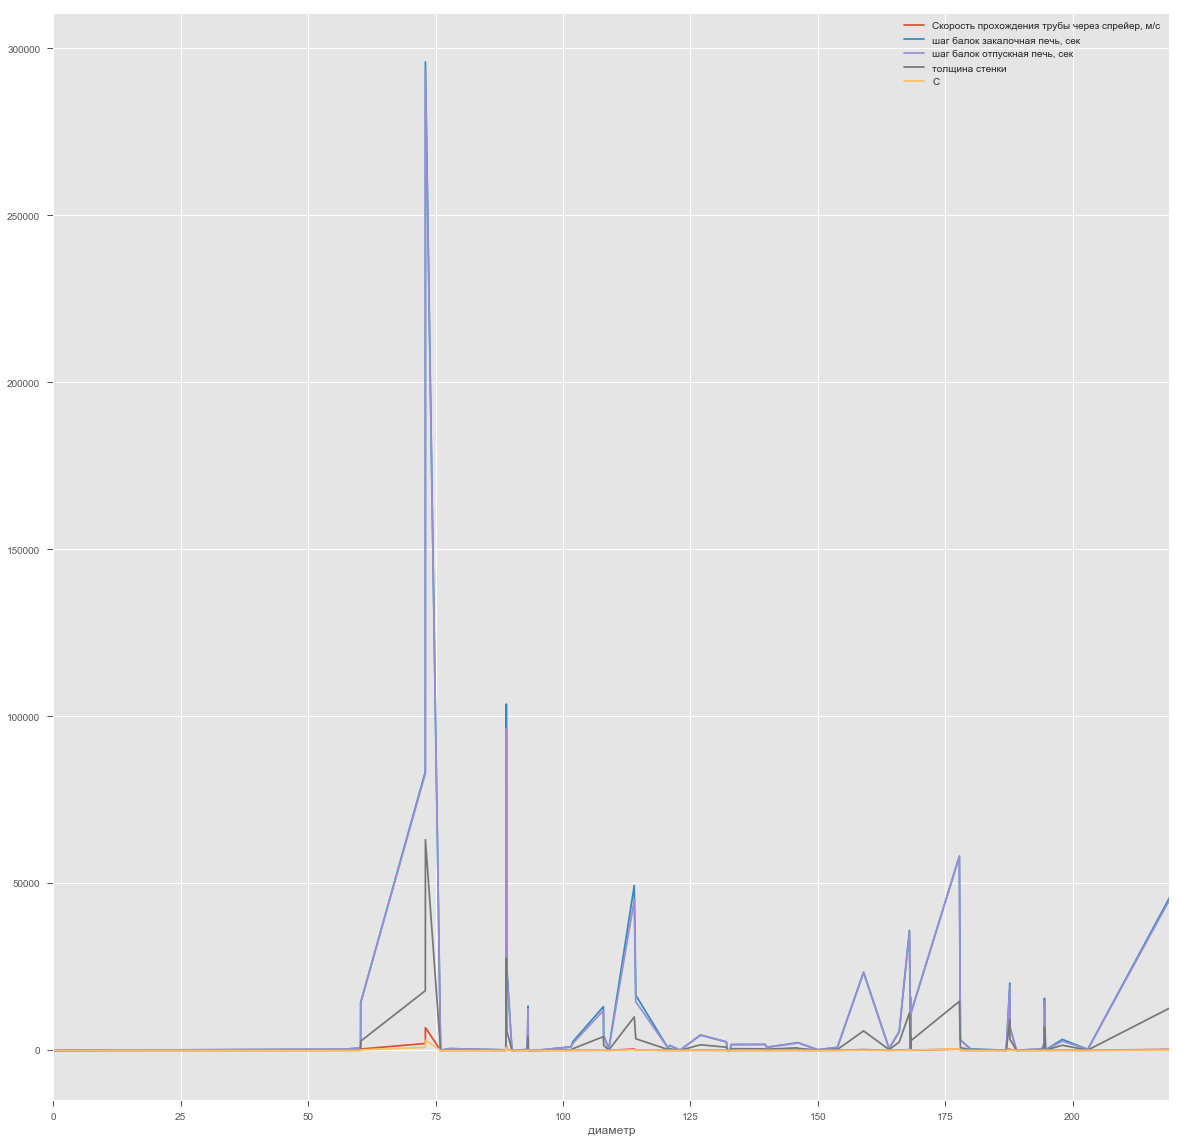

In [296]:
import seaborn as sns
# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 20

ls_col = [
#     '1 зона по ВТР закалка', 
#     '2 зона по ВТР закалка',
#     '3 зона по ВТР закалка', 
    'Скорость прохождения трубы через спрейер, м/с',
#     't˚ C трубы после спреера', 
#     '1 зона ВТР и уставка отпуск', 
#     '2 зона ВТР и уставка отпуск', 
#     '3 зона ВТР и уставка отпуск',
#     '4 зона ВТР и уставка отпуск',
#     '5 зона ВТР и уставка отпуск', 
    'шаг балок закалочная печь, сек', 
    'шаг балок отпускная печь, сек',
    'диаметр', 
    'толщина стенки', 
    'C', 
#     'Mn', 
#     'Si', 
#     'P', 
#     'S',
#     'Cr', 
#     'Ni', 
#     'Cu', 
#     'Al', 
#     'V', 
#     'Ti', 
#     'Nb', 
#     'Mo', 
#     'N', 
#     'B'
]


sales_df = X[[x for x in X[ls_col]]]
sales_df.groupby('диаметр').sum().plot()

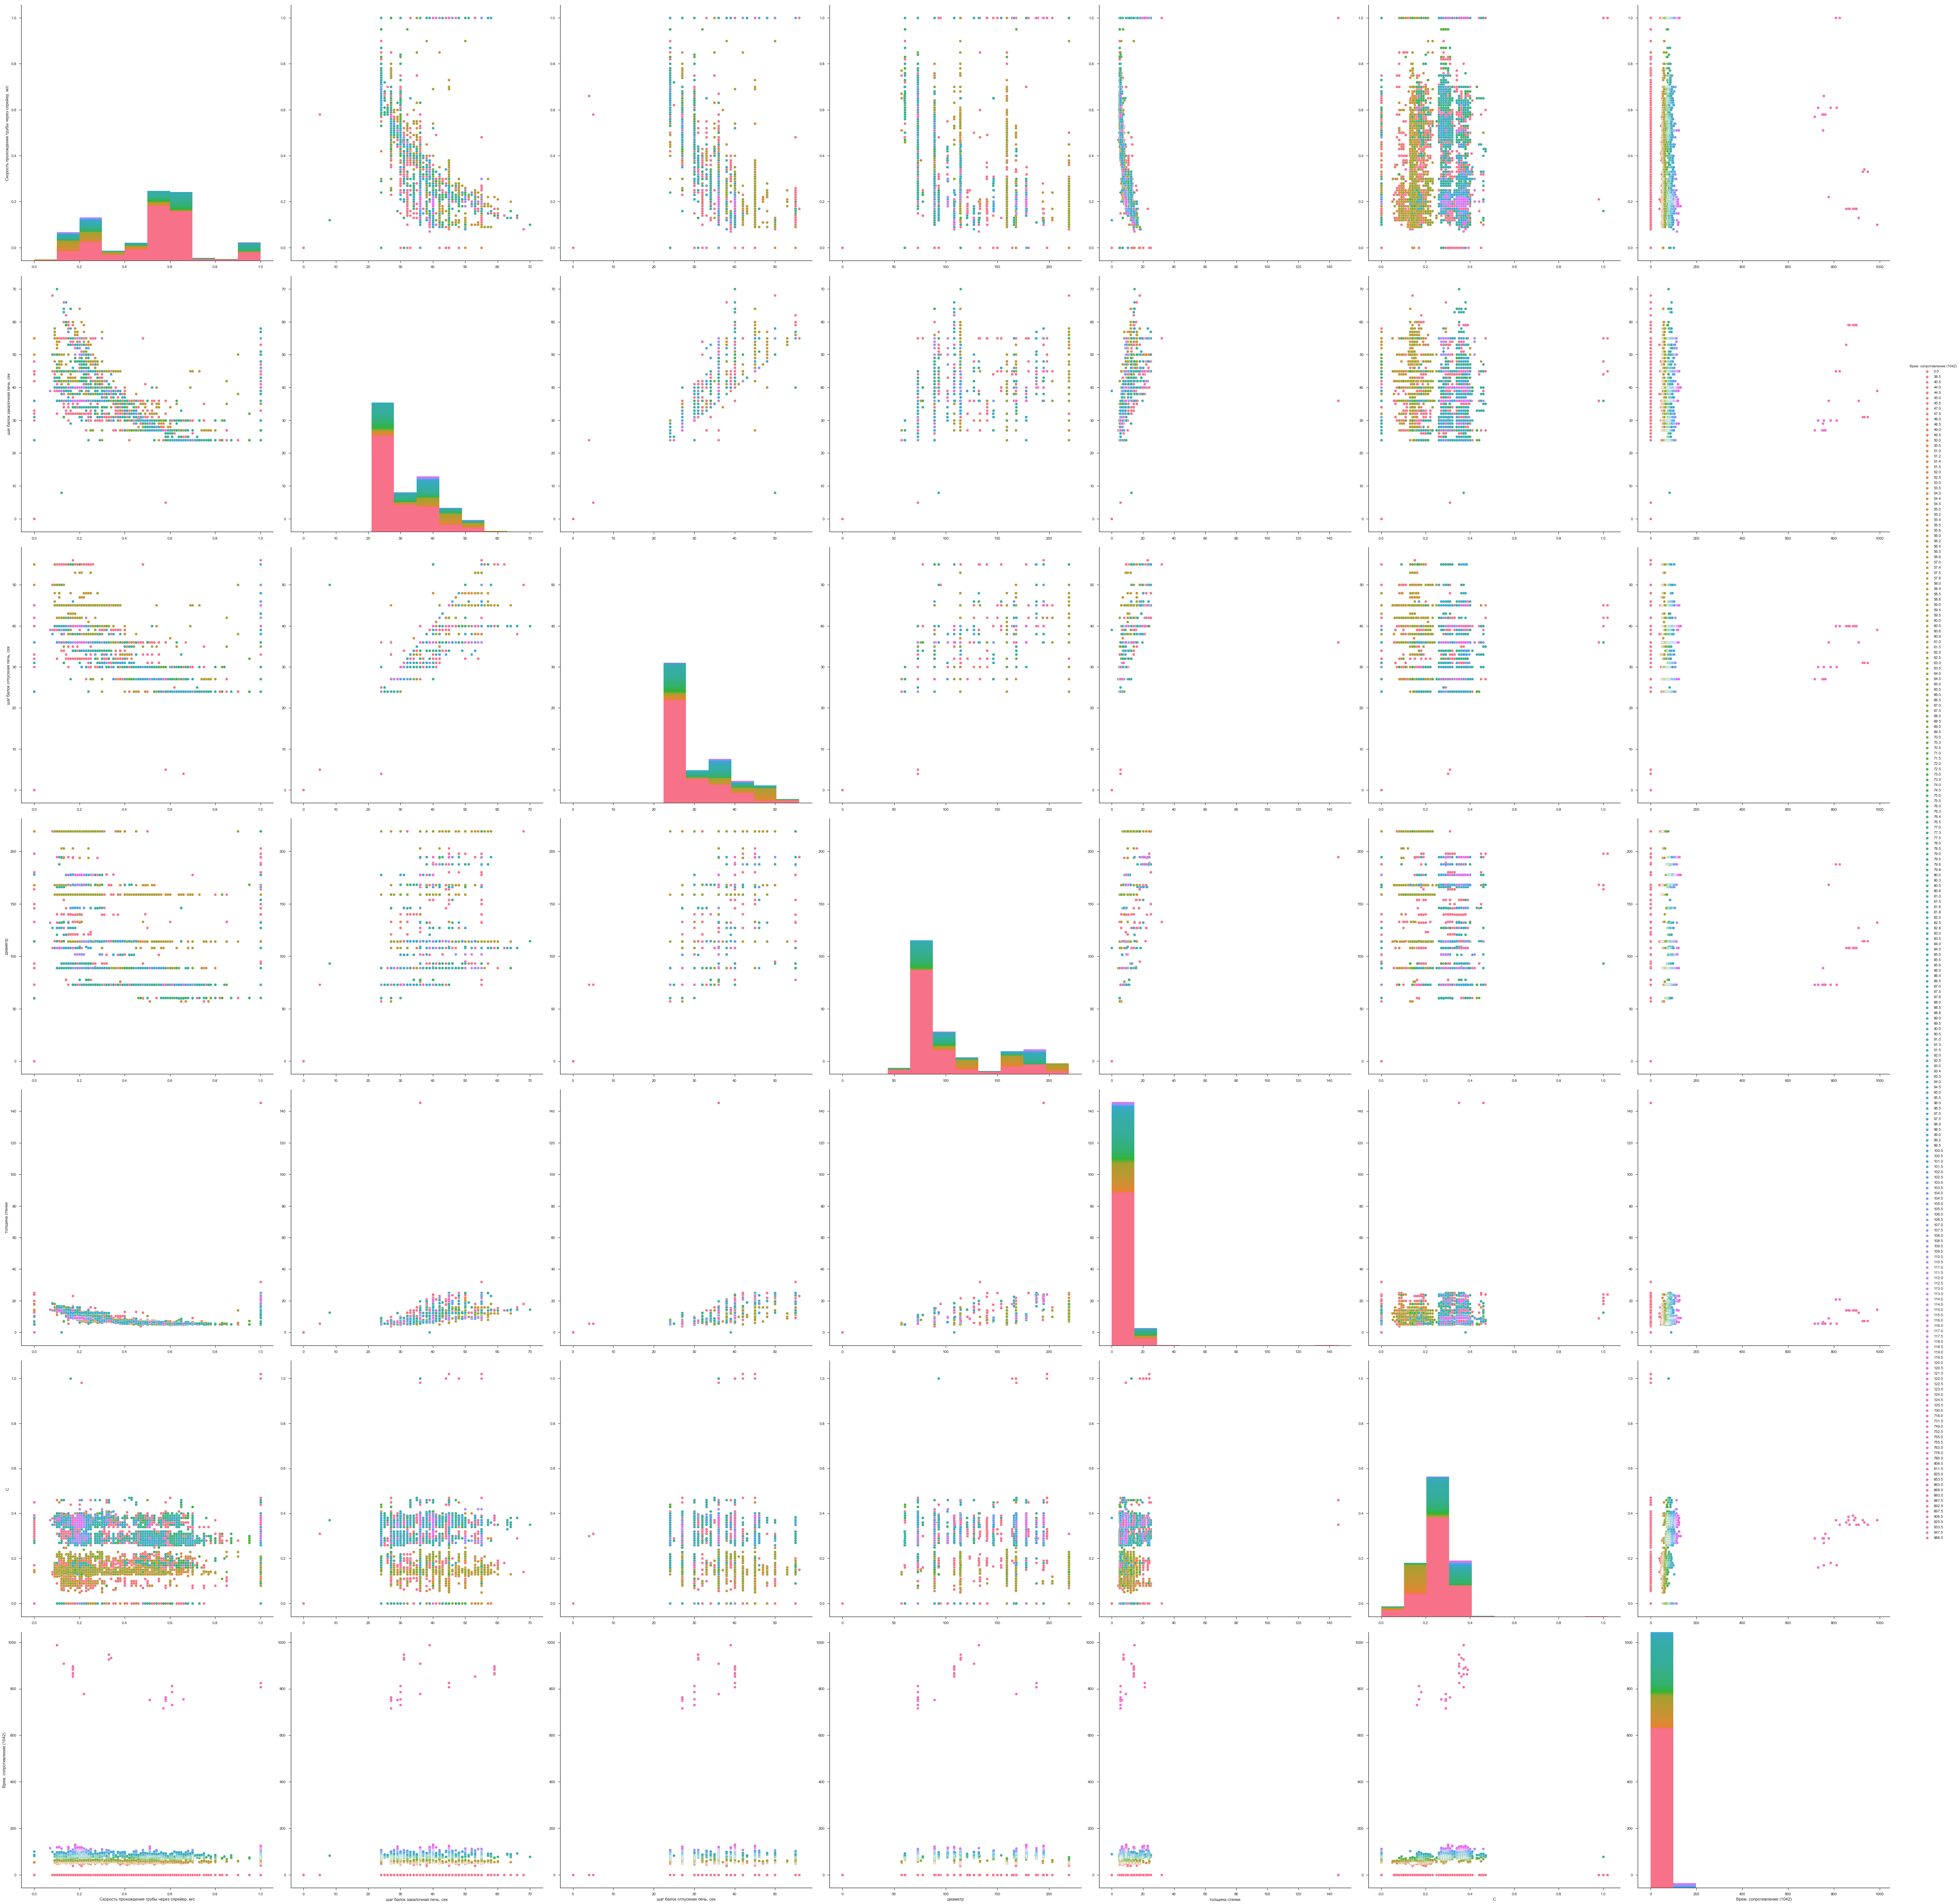

In [297]:
sns.set(style="ticks", color_codes=True)


sns_plot = sns.pairplot(df_merge[ls_col+ls_fluidity], hue='Врем. сопротивление (1042)', size=10)
sns_plot.savefig('pairplot_прочность.png')

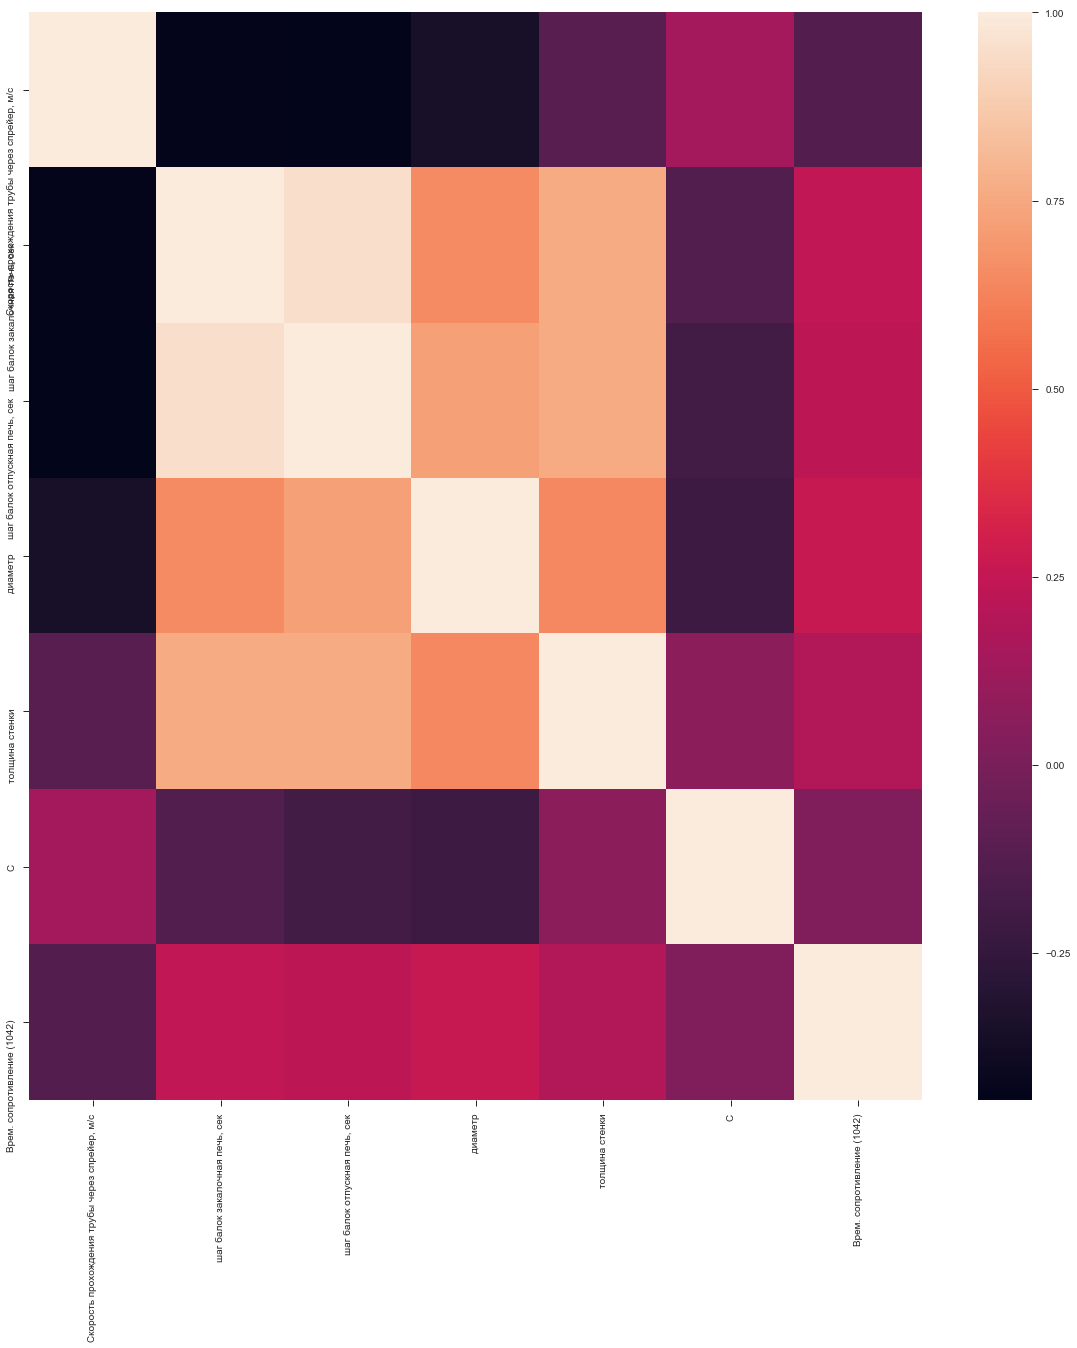

In [298]:
corr_matrix = df_merge[ls_col+ls_fluidity].corr()
sns_corr = sns.heatmap(corr_matrix).get_figure()
sns_corr.savefig('corr_прочность.png')

C:\Anaconda\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Anaconda\lib\site-packages\sklearn\decomposition\nmf.py:972: DeprecationWarning: invalid escape sequence \s
  """
C:\Anaconda\lib\site-packages\sklearn\decomposition\nmf.py:1186: DeprecationWarning: invalid escape sequence \s
  """
C:\Anaconda\lib\site-packages\sklearn\manifold\t_sne.py:420: DeprecationWarning: invalid escape sequence \s
  """


ValueError: c of shape (26367,) not acceptable as a color sequence for x with size 26367, y with size 26367

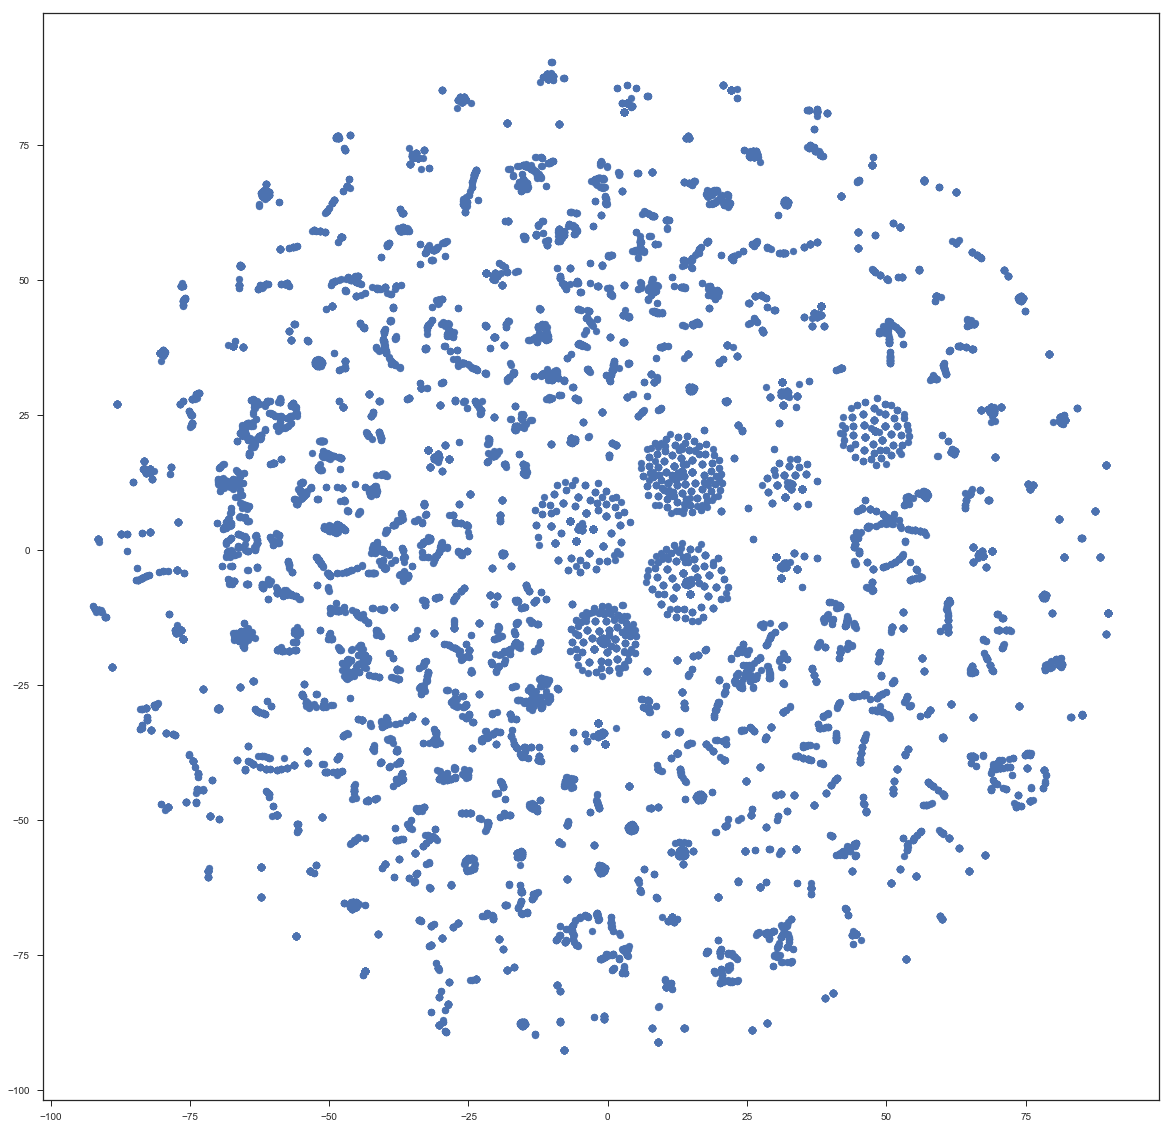

In [135]:
from sklearn.manifold import TSNE

X_tsne = df_merge[ls_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tsne)


tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df_merge['Предел текучести (1027)'].map({0: 'blue', 1: 'orange'}));